In [9]:
from temgymbasic.model import (
    Model,
)
from temgymbasic import components as comp
import numpy as np
from temgymbasic.utils import calculate_phi_0


n_rays = 1
wavelength = 0.01
k = 2 * np.pi / wavelength

wavelengths = np.full(n_rays, wavelength)

size = 512
det_shape = (size, size)
pixel_size = 0.005
dsize = det_shape[0] * pixel_size

x_det = np.linspace(-dsize / 2, dsize / 2, size)

wo = 0.1
wos = np.full(n_rays, wo)

div = wavelength / (np.pi * wo)

dPx = wo
dPy = wo
dHx = div
dHy = div

z_r = (np.pi * wo ** 2) / wavelengths 

theta_x = 5
theta_y = 0

deg_yx = np.deg2rad((theta_y, theta_x))
tilt_yx = np.tan(deg_yx)

x0 = -0.2
y0 = 0

lens_dist = 1
focal = 0.7
prop_dist = 1

components = (
    comp.GaussBeam(
        z=0.0,
        voltage=calculate_phi_0(wavelength),
        radius=x0,
        wo=wo,
        tilt_yx=tilt_yx
    ),
    comp.Lens(
        z = lens_dist,
        f = focal,
    ),
    comp.AccumulatingDetector(
        z = lens_dist + prop_dist,
        pixel_size=pixel_size,
        shape=det_shape,
        buffer_length=1,
    ),
)

model = Model(components)

for _ in range(1):
    rays = tuple(model.run_iter(num_rays=n_rays, random = False))
    image = model.detector.get_image(rays[-1])


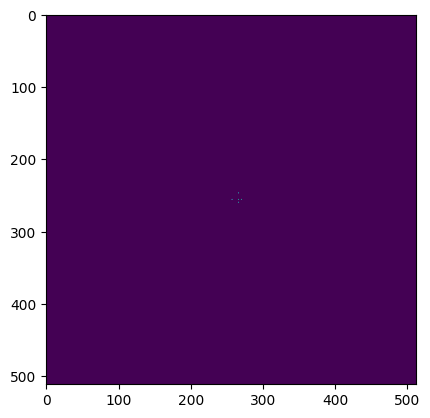

In [10]:
import matplotlib.pyplot as plt
plt.imshow(np.angle(image))
plt.savefig("phase.png")
plt.imshow(np.abs(image))
plt.savefig("amp.png")